In [1]:
surname = "Матвиенко"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  5
Задача № 1, шаг 11 - вариант:  1
задача № 2 - вариант:  1


### Дескриптивный анализ данных
В работе реализована загрузка и трансформация данных, вычисление простых статистик и визуализация данных в виде графиков и диаграмм

#### Импорт библиотек

In [94]:
import pandas as pd
import numpy as npa
import matplotlib.pyplot as plt
import re

## Анализ индикаторов качества государственного управления 
### (The Worldwide Government Indicators, WGI)

### 1. Загрузка данных и просмотр датасета

In [3]:
#Загрузка данных в DataFrame
df = pd.read_excel(open("wgidataset.xlsx", 'rb'),
              sheet_name='ControlofCorruption', header=[13,14])
df

Unnamed: 0_level_0 Unnamed: 1_level_0      1996                   \
     Country/Territory               Code  Estimate    StdErr NumSrc   
0                Aruba                ABW       NaN       NaN    NaN   
1              Andorra                ADO  1.318143  0.480889    1.0   
2          Afghanistan                AFG -1.291705  0.340507    2.0   
3               Angola                AGO -1.167702  0.262077    4.0   
4             Anguilla                AIA       NaN       NaN    NaN   
..                 ...                ...       ...       ...    ...   
209             Serbia                SRB -1.140072  0.262077    4.0   
210       South Africa                ZAF  0.732927  0.210325    6.0   
211   Congo, Dem. Rep.                ZAR -1.647852  0.315914    3.0   
212             Zambia                ZMB -0.840641  0.262077    4.0   
213           Zimbabwe                ZWE -0.278847  0.244907    5.0   

                                          1998            ...   2020  \
          Rank      Lower      Upper  Estimate    StdErr  ... NumSrc   
0          NaN        NaN        NaN       NaN       NaN  ...    2.0   
1    87.096771  72.043015  96.774193  1.334759  0.453149  ...    1.0   
2     4.301075   0.000000  27.419355 -1.176012  0.324013  ...    9.0   
3     9.677420   0.537634  27.419355 -1.180451  0.227055  ...    8.0   
4          NaN        NaN        NaN       NaN       NaN  ...    1.0   
..         ...        ...        ...       ...       ...  ...    ...   
209  11.827957   0.537634  29.032259 -1.195605  0.191027  ...    9.0   
210  76.344086  66.129036  81.182793  0.638809  0.188628  ...   12.0   
211   0.000000   0.000000  12.365591 -1.416679  0.310343  ...   11.0   
212  24.731182   5.913979  41.397850 -0.853156  0.227055  ...   13.0   
213  47.849461  30.645161  60.752689 -0.504802  0.198134  ...   12.0   

                                          2021                              \
          Rank      Lower      Upper  Estimate    StdErr NumSrc       Rank   
0    86.057693  77.884613  93.750000  0.834079  0.309729    2.0  79.326920   
1    88.461540  74.519234  95.192307  1.325617  0.430106    1.0  88.942307   
2     4.807693   0.000000  10.576923 -1.142377  0.183094    8.0  12.500000   
3    18.269230  10.576923  26.923077 -0.655346  0.163930    9.0  27.884615   
4    74.519234  58.173077  86.538460  0.680943  0.430106    1.0  74.519234   
..         ...        ...        ...       ...       ...    ...        ...   
209  38.461540  26.923077  47.115383 -0.437255  0.162596    9.0  36.057693   
210  56.250000  46.634617  61.538460  0.022103  0.163233   10.0  55.769230   
211   2.403846   0.000000   8.173077 -1.552154  0.150822   11.0   4.326923   
212  26.442308  18.269230  33.173077 -0.753424  0.156055   11.0  25.480770   
213   9.615385   3.846154  15.384615 -1.257897  0.154067   11.0   8.653846   

                           
         Lower      Upper  
0    64.903847  88.942307  
1    71.634613  96.634613  
2     4.807693  21.153847  
3    18.750000  39.903847  
4    53.846153  88.942307  
..         ...        ...  
209  26.442308  49.519230  
210  47.596153  63.942307  
211   0.000000   6.730769  
212  15.865385  34.134617  
213   4.326923  16.346153  

[214 rows x 140 columns]

In [5]:
df.columns

MultiIndex([('Unnamed: 0_level_0', 'Country/Territory'),
            ('Unnamed: 1_level_0',              'Code'),
            (                1996,          'Estimate'),
            (                1996,            'StdErr'),
            (                1996,            'NumSrc'),
            (                1996,              'Rank'),
            (                1996,             'Lower'),
            (                1996,             'Upper'),
            (                1998,          'Estimate'),
            (                1998,            'StdErr'),
            ...
            (                2020,            'NumSrc'),
            (                2020,              'Rank'),
            (                2020,             'Lower'),
            (                2020,             'Upper'),
            (                2021,          'Estimate'),
            (                2021,            'StdErr'),
            (                2021,            'NumSrc'),
            (  

### 2. Сортировка данных по убыванию индекса DataFrame

In [5]:
df_descending = df.sort_index(ascending= False)
df_descending

Unnamed: 0_level_0 Unnamed: 1_level_0      1996                   \
     Country/Territory               Code  Estimate    StdErr NumSrc   
213           Zimbabwe                ZWE -0.278847  0.244907    5.0   
212             Zambia                ZMB -0.840641  0.262077    4.0   
211   Congo, Dem. Rep.                ZAR -1.647852  0.315914    3.0   
210       South Africa                ZAF  0.732927  0.210325    6.0   
209             Serbia                SRB -1.140072  0.262077    4.0   
..                 ...                ...       ...       ...    ...   
4             Anguilla                AIA       NaN       NaN    NaN   
3               Angola                AGO -1.167702  0.262077    4.0   
2          Afghanistan                AFG -1.291705  0.340507    2.0   
1              Andorra                ADO  1.318143  0.480889    1.0   
0                Aruba                ABW       NaN       NaN    NaN   

                                          1998            ...   2020  \
          Rank      Lower      Upper  Estimate    StdErr  ... NumSrc   
213  47.849461  30.645161  60.752689 -0.504802  0.198134  ...   12.0   
212  24.731182   5.913979  41.397850 -0.853156  0.227055  ...   13.0   
211   0.000000   0.000000  12.365591 -1.416679  0.310343  ...   11.0   
210  76.344086  66.129036  81.182793  0.638809  0.188628  ...   12.0   
209  11.827957   0.537634  29.032259 -1.195605  0.191027  ...    9.0   
..         ...        ...        ...       ...       ...  ...    ...   
4          NaN        NaN        NaN       NaN       NaN  ...    1.0   
3     9.677420   0.537634  27.419355 -1.180451  0.227055  ...    8.0   
2     4.301075   0.000000  27.419355 -1.176012  0.324013  ...    9.0   
1    87.096771  72.043015  96.774193  1.334759  0.453149  ...    1.0   
0          NaN        NaN        NaN       NaN       NaN  ...    2.0   

                                          2021                              \
          Rank      Lower      Upper  Estimate    StdErr NumSrc       Rank   
213   9.615385   3.846154  15.384615 -1.257897  0.154067   11.0   8.653846   
212  26.442308  18.269230  33.173077 -0.753424  0.156055   11.0  25.480770   
211   2.403846   0.000000   8.173077 -1.552154  0.150822   11.0   4.326923   
210  56.250000  46.634617  61.538460  0.022103  0.163233   10.0  55.769230   
209  38.461540  26.923077  47.115383 -0.437255  0.162596    9.0  36.057693   
..         ...        ...        ...       ...       ...    ...        ...   
4    74.519234  58.173077  86.538460  0.680943  0.430106    1.0  74.519234   
3    18.269230  10.576923  26.923077 -0.655346  0.163930    9.0  27.884615   
2     4.807693   0.000000  10.576923 -1.142377  0.183094    8.0  12.500000   
1    88.461540  74.519234  95.192307  1.325617  0.430106    1.0  88.942307   
0    86.057693  77.884613  93.750000  0.834079  0.309729    2.0  79.326920   

                           
         Lower      Upper  
213   4.326923  16.346153  
212  15.865385  34.134617  
211   0.000000   6.730769  
210  47.596153  63.942307  
209  26.442308  49.519230  
..         ...        ...  
4    53.846153  88.942307  
3    18.750000  39.903847  
2     4.807693  21.153847  
1    71.634613  96.634613  
0    64.903847  88.942307  

[214 rows x 140 columns]

### 3. Построение горизонтального столбчатого графика по индексу WGI за 2021 год (по rank)

In [6]:
#Выделение данных за 2021 год
#(Соединяем столбик(df) со всеми странами (Unnamed: 0_level_0) и столбцы 2021 (df от 2021)
df_2021 =  pd.concat([df['Unnamed: 0_level_0'], df[2021]], axis = 1)
df_2021

,Country/Territory,Estimate,StdErr,NumSrc,Rank,Lower,Upper
0,Aruba,0.834079,0.309729,2.0,79.326920,64.903847,88.942307
1,Andorra,1.325617,0.430106,1.0,88.942307,71.634613,96.634613
2,Afghanistan,-1.142377,0.183094,8.0,12.500000,4.807693,21.153847
3,Angola,-0.655346,0.163930,9.0,27.884615,18.750000,39.903847
4,Anguilla,0.680943,0.430106,1.0,74.519234,53.846153,88.942307
...,...,...,...,...,...,...,...
209,Serbia,-0.437255,0.162596,9.0,36.057693,26.442308,49.519230
210,South Africa,0.022103,0.163233,10.0,55.769230,47.596153,63.942307
211,"Congo, Dem. Rep.",-1.552154,0.150822,11.0,4.326923,0.000000,6.730769
212,Zambia,-0.753424,0.156055,11.0,25.480770,15.865385,34.134617


In [7]:
#просмотр информации о кол-ве пустых ячеек
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Territory  214 non-null    object 
 1   Estimate           209 non-null    float64
 2   StdErr             209 non-null    float64
 3   NumSrc             209 non-null    float64
 4   Rank               209 non-null    float64
 5   Lower              209 non-null    float64
 6   Upper              209 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.8+ KB


In [8]:
#удаление всех строк, содержащих np.nan, pd.NaT и None в столбце Rank
df_2021 = df_2021.dropna(subset=['Rank'])

In [9]:
#сортируем данные по убыванию rank
df_2021 = df_2021.sort_values(by="Rank", ascending=True)

In [10]:
#просмотр имеющихся стилей для построения графика
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [11]:
#выбор стиля
plt.style.use('ggplot')

#### График 1 - matplotlib

[Text(0.5, 1.0, 'WGI Index')]

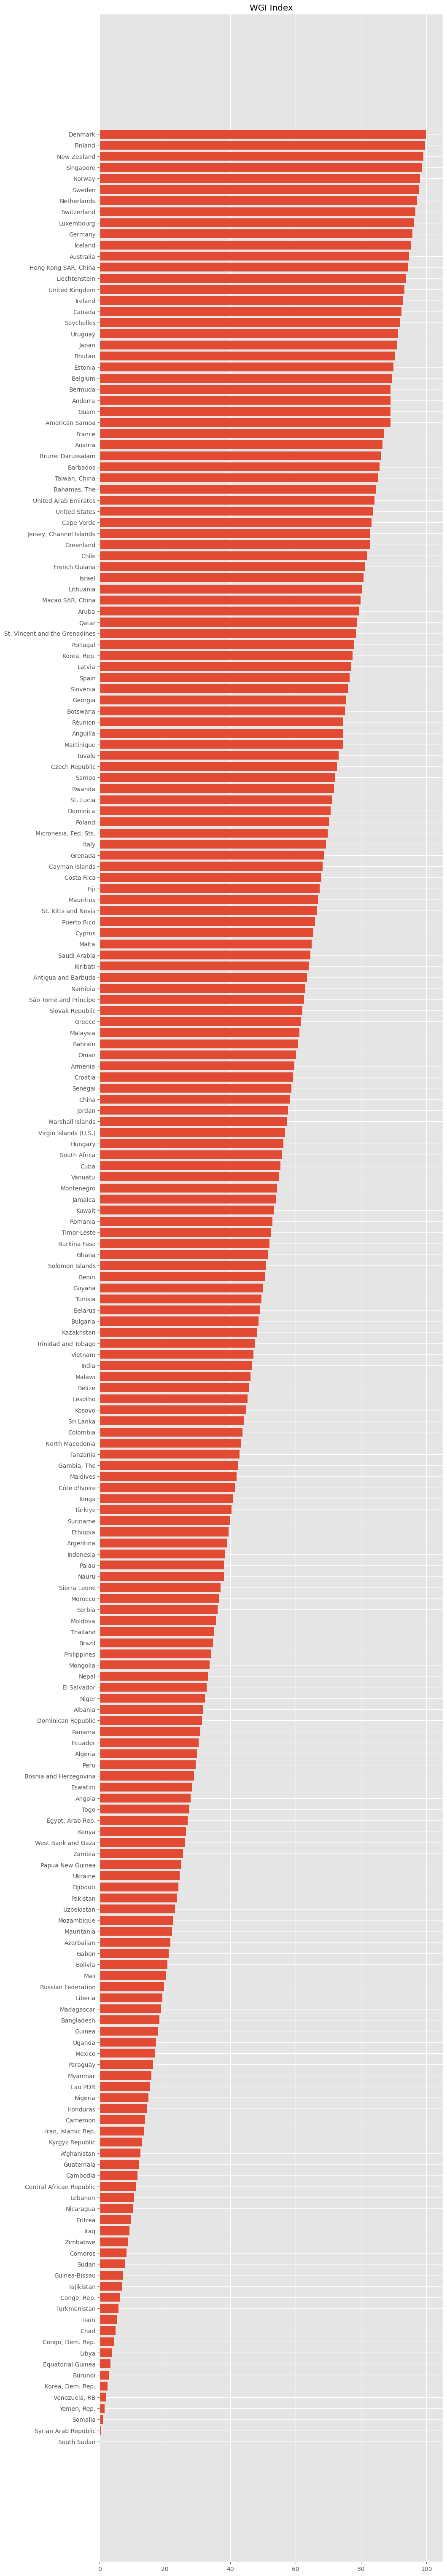

In [12]:
#построение графика только с помощью ф-ции subplots() в matplotlib.pyplot
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 78.5)
ax.barh(df_2021['Country/Territory'],df_2021['Rank'], height=0.8, align='center')
ax.set(title='WGI Index')

#### График 2 - pandas + matplotlib
##### получаем и преимущества графиков pandas, и доступ ко всей мощи matplotlib

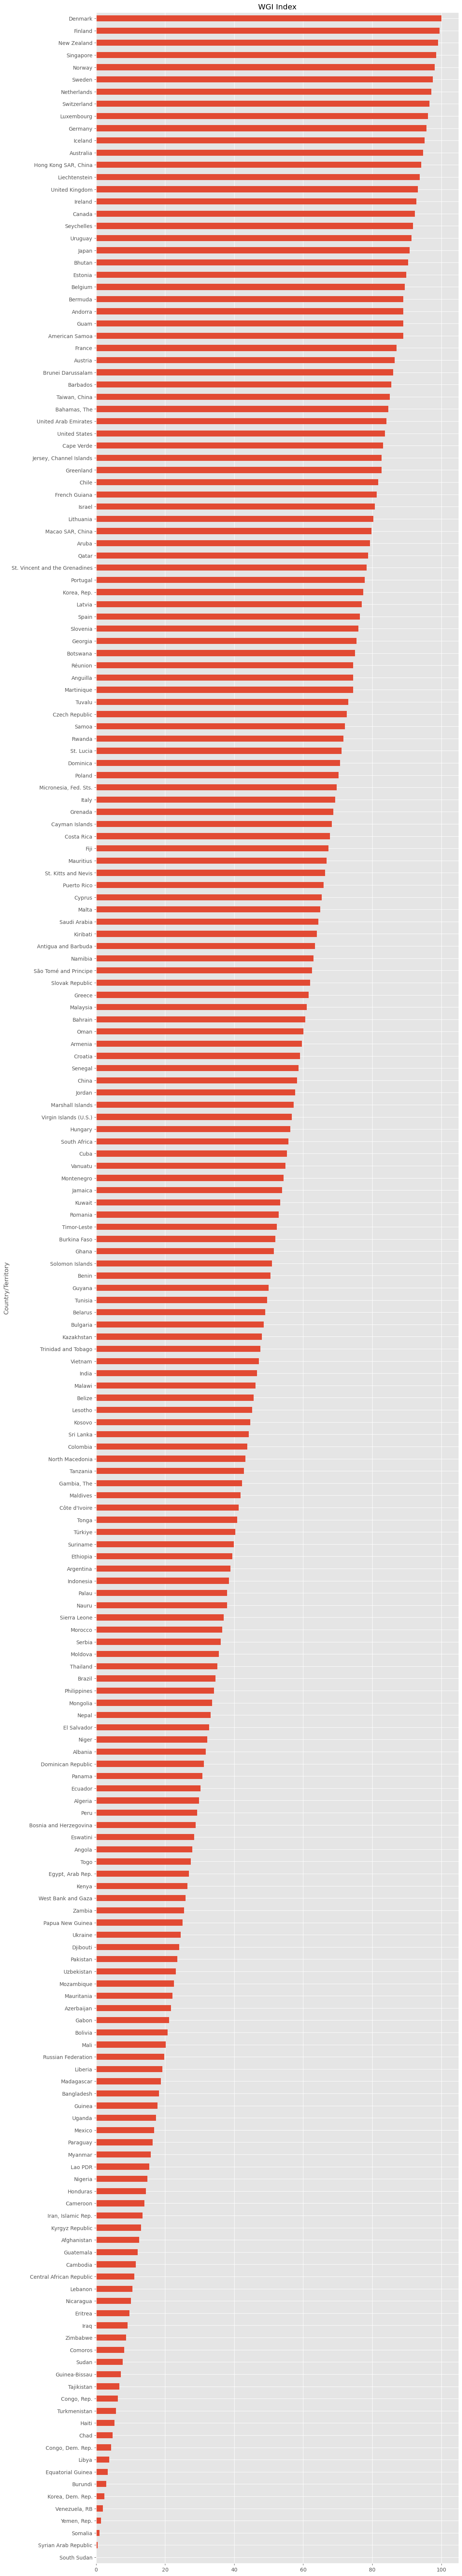

In [13]:
#построение графика с помощью стандартной функции построения (plotting) в pandas
fig, ax = plt.subplots() #добавляем вызов этой ф-ции, чтобы потом настраивать все с помощью объектов ax или fig
df_2021.plot(kind='barh', y='Rank', x='Country/Territory', ax=ax)
fig.set_size_inches(12.5, 88.5)
ax.set(title='WGI Index')
ax.legend().set_visible(False)

### 4. Формирование датафрейма, содержащего данные о странах Европы и Центральной Азии

In [15]:
#Загрузка df с данными о принадлежности страны конкретному региону
df_regns = pd.read_excel(open('regions.xlsx','rb'))
df_regns

,Country,Code,Region
0,Afghanistan,AFG,AP
1,Albania,ALB,ECA
2,Algeria,DZA,MENA
3,Angola,AGO,SSA
4,Argentina,ARG,AME
...,...,...,...
175,Venezuela,VEN,AME
176,Vietnam,VNM,AP
177,Yemen,YEM,MENA
178,Zambia,ZMB,SSA


In [16]:
#выделим все страны с кодом 'ECA'
df_reg_ECA = df_regns.loc[df_regns['Region']=='ECA']

#создадим список кодов стран в 'ECA'
ECA_code_list = list(df_reg_ECA.Code)

#создадим df, содержащий только те строки, которые в столбце 'Code' имеют значение, входящее в список ECA_code_list
df_ECA = df.loc[df['Unnamed: 1_level_0'].Code.isin(ECA_code_list)]
df_ECA

Unnamed: 0_level_0 Unnamed: 1_level_0      1996                   \
          Country/Territory               Code  Estimate    StdErr NumSrc   
5                   Albania                ALB -0.893903  0.315914    3.0   
9                   Armenia                ARM -0.473051  0.340507    2.0   
14               Azerbaijan                AZE -1.445619  0.275614    3.0   
23   Bosnia and Herzegovina                BIH -0.270570  0.275614    3.0   
24                  Belarus                BLR -0.389609  0.340507    2.0   
69                  Georgia                GEO -1.527264  0.340507    2.0   
98               Kazakhstan                KAZ -1.132820  0.275614    3.0   
100         Kyrgyz Republic                KGZ -0.993923  0.340507    2.0   
117                  Kosovo                KSV       NaN       NaN    NaN   
121                 Moldova                MDA -0.437427  0.275614    3.0   
126         North Macedonia                MKD -0.613846  0.275614    3.0   
131              Montenegro                MNE       NaN       NaN    NaN   
163      Russian Federation                RUS -1.053342  0.210325    6.0   
186              Tajikistan                TJK -1.273033  0.340507    2.0   
187            Turkmenistan                TKM -1.021493  0.340507    2.0   
192                 Türkiye                TUR -0.148074  0.210325    6.0   
197                 Ukraine                UKR -1.110137  0.255844    4.0   
200              Uzbekistan                UZB -1.128821  0.320799    2.0   
209                  Serbia                SRB -1.140072  0.262077    4.0   

                                          1998            ...   2020  \
          Rank      Lower      Upper  Estimate    StdErr  ... NumSrc   
5    19.354839   2.688172  43.010754 -0.992025  0.233192  ...    9.0   
9    38.172043  15.053763  59.139786 -0.936306  0.233192  ...    9.0   
14    2.688172   0.000000  17.204302 -1.289568  0.191027  ...    7.0   
23   48.924732  28.494623  60.752689 -0.402136  0.194088  ...    9.0   
24   42.473118  17.741936  60.752689 -0.323170  0.233192  ...    8.0   
69    1.075269   0.000000  17.741936 -0.982506  0.238827  ...    8.0   
98   12.365591   0.537634  30.107527 -1.078855  0.191027  ...   10.0   
100  17.204302   0.537634  39.784946 -1.058797  0.238827  ...   11.0   
117        NaN        NaN        NaN       NaN       NaN  ...    7.0   
121  39.784946  19.354839  57.526882 -0.399806  0.191027  ...    8.0   
126  32.258064  14.516129  51.075268 -0.636420  0.194088  ...    8.0   
131        NaN        NaN        NaN  0.497083  0.424762  ...    8.0   
163  15.053763   2.688172  29.032259 -0.954374  0.166408  ...   10.0   
186   5.913979   0.000000  29.032259 -1.252361  0.238827  ...    9.0   
187  15.591398   0.537634  38.709679 -1.068734  0.238827  ...    5.0   
192  51.612904  36.559139  61.827957 -0.354078  0.188628  ...   10.0   
197  13.440860   0.537634  29.569893 -1.258210  0.172825  ...   10.0   
200  12.903226   0.000000  32.258064 -1.134654  0.210521  ...    9.0   
209  11.827957   0.537634  29.032259 -1.195605  0.191027  ...    9.0   

                                          2021                              \
          Rank      Lower      Upper  Estimate    StdErr NumSrc       Rank   
5    31.730770  23.076923  45.192307 -0.555924  0.162596    9.0  31.730770   
9    57.692307  46.634617  63.461540  0.072150  0.182792    8.0  59.615383   
14   15.384615   8.173077  24.038462 -0.827585  0.184881    7.0  21.634615   
23   28.365385  20.673077  40.865383 -0.643699  0.174730    8.0  28.846153   
24   50.961540  41.346153  60.576923 -0.235337  0.168263    8.0  49.038460   
69   71.634613  64.423080  80.769234  0.688035  0.174730    8.0  75.480766   
98   42.307693  28.846153  50.000000 -0.236962  0.156094   10.0  48.076923   
100  13.461538   7.211538  20.673077 -1.124734  0.157293   11.0  12.980769   
117  37.019230  25.000000  48.076923 -0.318530  0.171027    8.0  44.711540   
121  32.211540  23.5

## 5. Построение графиков индекса WGI за 2012-2023 для стран Европы и Центральной Азии (estimate)

In [95]:
#загрузка датафрейма из https://www.transparency.org/en/cpi/2021/
df_WGI = pd.read_excel(open('CPI2022_GlobalResultsTrends.xlsx', 'rb'), sheet_name='CPI Timeseries 2012 - 2022', header=[2])
df_WGI

,Country / Territory,ISO3,Region,CPI score 2022,Rank 2022,Sources 2022,Standard error 2022,CPI score 2021,Rank 2021,Sources 2021,...,Standard error 2015,CPI score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
0,Afghanistan,AFG,AP,24.0,150.0,4.0,6.299999,16.0,174.0,5.0,...,3.49,12.0,4.0,1.29,8.0,3.0,3.3,8.0,3.0,3.3
1,Albania,ALB,ECA,36.0,101.0,8.0,1.316355,35.0,110.0,8.0,...,3.58,33.0,7.0,1.51,31.0,7.0,2.1,33.0,7.0,2.0
2,United Arab Emirates,ARE,MENA,67.0,27.0,7.0,3.102045,69.0,24.0,8.0,...,5.07,70.0,7.0,5.14,69.0,7.0,4.7,68.0,7.0,4.3
3,Angola,AGO,SSA,33.0,116.0,7.0,2.807703,29.0,136.0,7.0,...,1.80,19.0,6.0,1.71,23.0,7.0,2.8,22.0,7.0,1.8
4,Argentina,ARG,AME,38.0,94.0,7.0,2.334808,38.0,96.0,8.0,...,1.84,34.0,7.0,2.42,34.0,8.0,2.4,35.0,8.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Venezuela,VEN,AME,14.0,177.0,8.0,1.296945,14.0,177.0,8.0,...,2.64,19.0,7.0,1.69,20.0,7.0,2.3,19.0,7.0,2.1
177,Vietnam,VNM,AP,42.0,77.0,8.0,1.497007,39.0,87.0,8.0,...,2.56,31.0,8.0,2.55,31.0,8.0,2.6,31.0,8.0,2.5
178,Syria,SYR,MENA,13.0,178.0,5.0,1.568910,13.0,178.0,5.0,...,5.66,20.0,4.0,5.31,17.0,4.0,3.8,26.0,5.0,2.7
179,Zambia,ZMB,SSA,33.0,116.0,9.0,1.495884,33.0,117.0,9.0,...,2.55,38.0,8.0,2.27,38.0,8.0,2.1,37.0,8.0,3.1


In [92]:
#создадим df, содержащий строки, входящее в список ECA_code_list
df_WGI_ECA = df_CPI.loc[df_CPI['ISO3'].isin(ECA_code_list)]
df_WGI_ECA

,Country / Territory,ISO3,Region,CPI score 2022,Rank 2022,Sources 2022,Standard error 2022,CPI score 2021,Rank 2021,Sources 2021,...,Standard error 2015,CPI score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
1,Albania,ALB,ECA,36.0,101.0,8.0,1.316355,35.0,110.0,8.0,...,3.58,33.0,7.0,1.51,31.0,7.0,2.1,33.0,7.0,2.0
5,Armenia,ARM,ECA,46.0,63.0,6.0,2.467806,49.0,58.0,6.0,...,2.98,37.0,6.0,3.69,36.0,6.0,3.5,34.0,6.0,2.7
8,Azerbaijan,AZE,ECA,23.0,157.0,6.0,2.397118,30.0,128.0,7.0,...,3.25,29.0,6.0,3.02,28.0,6.0,3.5,27.0,6.0,2.5
13,Belarus,BLR,ECA,39.0,91.0,7.0,3.135647,41.0,82.0,8.0,...,4.37,31.0,5.0,4.04,29.0,5.0,4.0,31.0,5.0,3.6
18,Bosnia and Herzegovina,BIH,ECA,34.0,110.0,7.0,2.184636,35.0,110.0,7.0,...,1.71,39.0,6.0,1.15,42.0,7.0,2.9,42.0,7.0,2.3
60,Georgia,GEO,ECA,56.0,41.0,6.0,3.026622,55.0,45.0,6.0,...,6.53,52.0,6.0,6.47,49.0,6.0,6.9,52.0,6.0,6.0
84,Kazakhstan,KAZ,ECA,36.0,101.0,9.0,3.287702,37.0,102.0,9.0,...,4.90,29.0,8.0,4.40,26.0,8.0,3.3,28.0,8.0,4.1
88,Kosovo,KSV,ECA,41.0,84.0,6.0,2.576214,39.0,87.0,6.0,...,2.19,33.0,3.0,2.33,33.0,3.0,2.3,34.0,3.0,1.5
90,Kyrgyzstan,KGZ,ECA,27.0,140.0,7.0,1.317177,27.0,144.0,7.0,...,2.29,27.0,6.0,2.35,24.0,6.0,2.3,24.0,6.0,1.8
108,Moldova,MDA,ECA,39.0,91.0,8.0,1.646075,36.0,105.0,7.0,...,2.88,35.0,8.0,2.70,35.0,8.0,2.8,36.0,8.0,2.6


In [188]:
#Создадим df, который содержит только столбцы CPI score
CPI_colms = [i for i in df_WGI_ECA if re.fullmatch('CPI.+', i)]
df_CPI = df_WGI_ECA[CPI_colms]
df_CPI

,CPI score 2022,CPI score 2021,CPI score 2020,CPI score 2019,CPI score 2018,CPI score 2017,CPI score 2016,CPI score 2015,CPI score 2014,CPI Score 2013,CPI Score 2012
1,36.0,35.0,36.0,35.0,36.0,38.0,39.0,36.0,33.0,31.0,33.0
5,46.0,49.0,49.0,42.0,35.0,35.0,33.0,35.0,37.0,36.0,34.0
8,23.0,30.0,30.0,30.0,25.0,31.0,30.0,29.0,29.0,28.0,27.0
13,39.0,41.0,47.0,45.0,44.0,44.0,40.0,32.0,31.0,29.0,31.0
18,34.0,35.0,35.0,36.0,38.0,38.0,39.0,38.0,39.0,42.0,42.0
60,56.0,55.0,56.0,56.0,58.0,56.0,57.0,52.0,52.0,49.0,52.0
84,36.0,37.0,38.0,34.0,31.0,31.0,29.0,28.0,29.0,26.0,28.0
88,41.0,39.0,36.0,36.0,37.0,39.0,36.0,33.0,33.0,33.0,34.0
90,27.0,27.0,31.0,30.0,29.0,29.0,28.0,28.0,27.0,24.0,24.0
108,39.0,36.0,34.0,32.0,33.0,31.0,30.0,33.0,35.0,35.0,36.0


In [197]:
#Сделаем индексами не числа, а страны, соответствующие каждой из строк df
df_CPI.set_index(df_WGI_ECA['Country / Territory'], inplace=True)

#Транспонируем df для того, чтобы без затруднений построить график
df_CPI = df_CPI.T
df_CPI

Country / Territory,Albania,Armenia,Azerbaijan,Belarus,Bosnia and Herzegovina,Georgia,Kazakhstan,Kosovo,Kyrgyzstan,Moldova,Montenegro,North Macedonia,Russia,Serbia,Tajikistan,Turkey,Turkmenistan,Ukraine,Uzbekistan
CPI score 2022,36.0,46.0,23.0,39.0,34.0,56.0,36.0,41.0,27.0,39.0,45.0,40.0,28.0,36.0,24.0,36.0,19.0,33.0,31.0
CPI score 2021,35.0,49.0,30.0,41.0,35.0,55.0,37.0,39.0,27.0,36.0,46.0,39.0,29.0,38.0,25.0,38.0,19.0,32.0,28.0
CPI score 2020,36.0,49.0,30.0,47.0,35.0,56.0,38.0,36.0,31.0,34.0,45.0,35.0,30.0,38.0,25.0,40.0,19.0,33.0,26.0
CPI score 2019,35.0,42.0,30.0,45.0,36.0,56.0,34.0,36.0,30.0,32.0,45.0,35.0,28.0,39.0,25.0,39.0,19.0,30.0,25.0
CPI score 2018,36.0,35.0,25.0,44.0,38.0,58.0,31.0,37.0,29.0,33.0,45.0,37.0,28.0,39.0,25.0,41.0,20.0,32.0,23.0
CPI score 2017,38.0,35.0,31.0,44.0,38.0,56.0,31.0,39.0,29.0,31.0,46.0,35.0,29.0,41.0,21.0,40.0,19.0,30.0,22.0
CPI score 2016,39.0,33.0,30.0,40.0,39.0,57.0,29.0,36.0,28.0,30.0,45.0,37.0,29.0,42.0,25.0,41.0,22.0,29.0,21.0
CPI score 2015,36.0,35.0,29.0,32.0,38.0,52.0,28.0,33.0,28.0,33.0,44.0,42.0,29.0,40.0,26.0,42.0,18.0,27.0,19.0
CPI score 2014,33.0,37.0,29.0,31.0,39.0,52.0,29.0,33.0,27.0,35.0,42.0,45.0,27.0,41.0,23.0,45.0,17.0,26.0,18.0
CPI Score 2013,31.0,36.0,28.0,29.0,42.0,49.0,26.0,33.0,24.0,35.0,44.0,44.0,28.0,42.0,22.0,50.0,17.0,25.0,17.0


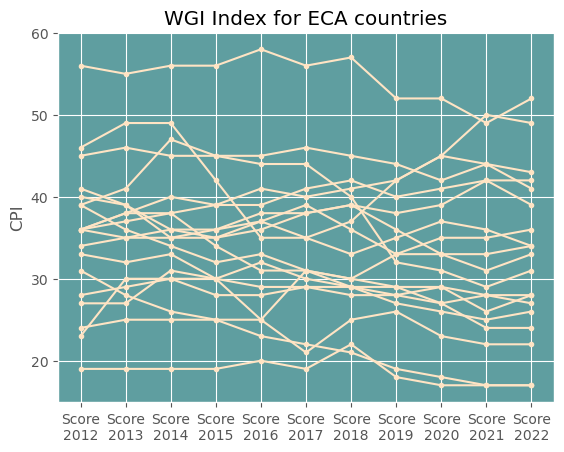

In [202]:
#Построение графика

fig, ax = plt.subplots()
df_CPI.plot.line(style='.-', ax=ax, color='#FFE4C4', title='WGI Index for ECA countries') #6A5ACD#D2B48C - другие красивые цвета
ax.set_facecolor('#5F9EA0') # цвет фона
ax.set_ylabel(ylabel='CPI')

#Зададим расстояние между точками каждого года и поменяем метки так, чтобы они не налезали друг на друга при просмотре
plt.xticks(range(0,11), labels=['Score\n'+str(i) for i in range(2012,2023)])
ax.legend().set_visible(False)

### 6. Страны Европы и Средней Азии с наибольшим и наименьшим значением CPI за 2021 год

In [217]:
#Поиск минимального и максимального значений CPI

CPI_2022 = df_CPI.loc['CPI score 2022'] #значения CPI всех стран ECA за 2022
min_CPI = min(CPI_2022)
max_CPI = max(CPI_2022)

In [221]:
#Поиск стран с минимальным и максимального значениями CPI
cntrs_min_CPI = [i for i in df_CPI.columns if df_CPI[i].loc['CPI score 2022'] == min_CPI]
cntrs_max_CPI = [i for i in df_CPI.columns if df_CPI[i].loc['CPI score 2022'] == max_CPI]

#Вывод
print('Страна' if len(cntrs_min_CPI)==1 else 'Страны', 'с наименьшим CPI:', *cntrs_min_CPI)
print('Страна' if len(cntrs_min_CPI)==1 else 'Страны', 'с наибольшим CPI:', *cntrs_max_CPI)

Страна с наименьшим CPI: Turkmenistan
Страна с наибольшим CPI: Georgia


In [222]:
#Вывод всех CPI для проверки результатов работы
CPI_2022

Country / Territory
Albania                   36.0
Armenia                   46.0
Azerbaijan                23.0
Belarus                   39.0
Bosnia and Herzegovina    34.0
Georgia                   56.0
Kazakhstan                36.0
Kosovo                    41.0
Kyrgyzstan                27.0
Moldova                   39.0
Montenegro                45.0
North Macedonia           40.0
Russia                    28.0
Serbia                    36.0
Tajikistan                24.0
Turkey                    36.0
Turkmenistan              19.0
Ukraine                   33.0
Uzbekistan                31.0
Name: CPI score 2022, dtype: float64

### 7. Средние значения за каждый год в период с 2012 по 2021

In [ ]:
mean_CPY = []

### 8. Построение графика индека CPI с учетом полученных выше результатов

### 9. Падение России в рейтинге c 2012 по 2021

#### 9.1 На сколько позиций
⚠️ У нескольких стран может быть одна и та же позиция в рейтинге из-за одинаковых значений индекса

#### 9.2 На сколько процентов

### Вывод итоговых результатов